In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

### How many rows/columns are there?

In [4]:
data.shape

(200, 5)

### How many customers are there?

In [5]:
data['CustomerID'].nunique()

200

This means, we have 200 unique customer IDs

### How many of each gender type are there?

In [6]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

This means, there are more female than male in our dataset.

### How does the annual income distribution of our customers look like?

Descriptive Statistics

In [7]:
data['Annual Income (k$)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
10%       23.900000
20%       37.800000
30%       46.000000
40%       54.000000
50%       61.500000
60%       67.000000
70%       74.300000
80%       78.200000
90%       93.400000
max      137.000000
Name: Annual Income (k$), dtype: float64

The annual income ranges from 15 to 137 with an average (median) annual income is 61 k$.

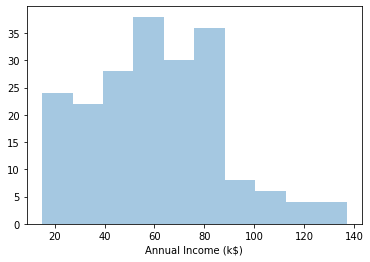

In [8]:
sns.distplot(data['Annual Income (k$)'], kde=False)

### How does the spending score distribution look like?

In [10]:
data['Spending Score (1-100)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
10%       13.000000
20%       26.000000
30%       40.000000
40%       45.600000
50%       50.000000
60%       55.000000
70%       61.600000
80%       75.000000
90%       87.100000
max       99.000000
Name: Spending Score (1-100), dtype: float64

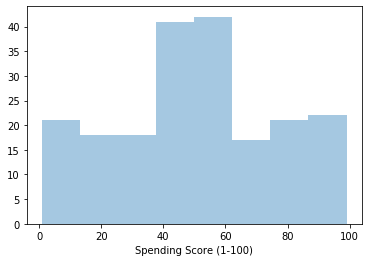

In [11]:
sns.distplot(data['Spending Score (1-100)'], kde=False)

Spend score is pretty much normally distributed.

### How does the age distribution look like?

In [31]:
data['Age'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
10%       21.000000
20%       26.800000
30%       30.000000
40%       32.000000
50%       36.000000
60%       40.000000
70%       47.000000
80%       50.200000
90%       59.100000
max       70.000000
Name: Age, dtype: float64

# Clustering

In [12]:
# from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture

In [24]:
# Get features we need
features = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


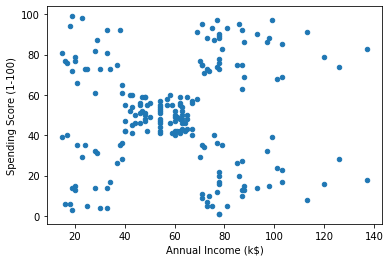

In [25]:
# If you have 2 features, you can plot it on a 2D scatter plot
X.plot.scatter('Annual Income (k$)', 'Spending Score (1-100)')

### Perform GMM

In [26]:
# Use DBSCAN and vary eps and min_samples
gm = GaussianMixture(n_components=4)

# Fit data to model
gm.fit(X)

# Get labels
labels = gm.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [27]:
new_data.head()

,Annual Income (k$),Spending Score (1-100),Age,labels
0,15,39,19,3
1,15,81,21,2
2,16,6,20,3
3,16,77,23,2
4,17,40,31,3


In [28]:
# How many labels were created
new_data.labels.value_counts()

3    76
2    50
0    39
1    35
Name: labels, dtype: int64

### Plot Points in Clusters

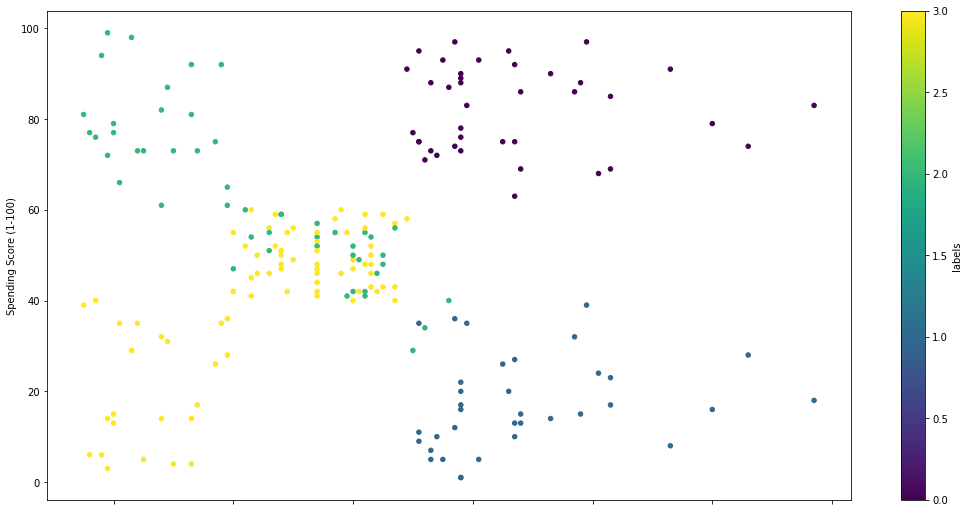

In [29]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='Annual Income (k$)', 
                      y='Spending Score (1-100)', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(18, 9))



# Deep Dive to each cluster
- Median income = 61, median spend = 50, median age = 36

In [32]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,39.000000,39.000000,39.000000,39.0
mean,86.538462,82.128205,32.692308,0.0
std,16.312485,9.364489,3.728650,0.0
min,69.000000,63.000000,27.000000,0.0
25%,75.500000,74.500000,30.000000,0.0
50%,79.000000,83.000000,32.000000,0.0
75%,95.000000,90.000000,35.500000,0.0
max,137.000000,97.000000,40.000000,0.0


Cluster 0: The gastadorang sosyalerang milennials (High Income, High Spend, Early 30s)

In [33]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,35.000000,35.000000,35.000000,35.0
mean,88.228571,17.285714,41.685714,1.0
std,16.367266,10.211215,10.897305,0.0
min,71.000000,1.000000,19.000000,1.0
25%,77.500000,10.000000,35.000000,1.0
50%,85.000000,16.000000,43.000000,1.0
75%,97.500000,23.500000,47.500000,1.0
max,137.000000,39.000000,59.000000,1.0


Cluster 1: The kuripot don and donyas (High Income, Low Spend, Late 40's).

In [34]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,50.000000,50.000000,50.000000,50.0
mean,43.300000,62.780000,24.440000,2.0
std,18.063663,17.400786,4.916279,0.0
min,15.000000,29.000000,18.000000,2.0
25%,28.000000,50.250000,21.000000,2.0
50%,42.500000,59.000000,23.000000,2.0
75%,60.000000,75.750000,27.000000,2.0
max,76.000000,99.000000,35.000000,2.0


Cluster 2: The isang-kahig-dalawang-tuka Gen-Zs (Low Earn, Mid spend, early 20's).

In [35]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,76.000000,76.000000,76.000000,76.0
mean,45.842105,40.697368,50.184211,3.0
std,15.317139,15.722612,12.206786,0.0
min,15.000000,3.000000,19.000000,3.0
25%,36.250000,35.000000,41.500000,3.0
50%,48.000000,45.500000,49.000000,3.0
75%,59.250000,51.250000,60.000000,3.0
max,69.000000,60.000000,70.000000,3.0


Cluster 2: Titos and Titas who like to live dangerously (Low Income, Mid Spend, late 40s).

# Exercises: 
- Add more features to X and see the results of the clusters.
- Add more clusters and see how the clusters look like.

# See code that compares all possible [clustering algorithms](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py).

# Homework: Perform Clustering on [Credit Card Dataset](https://drive.google.com/file/d/1EtH7Y4Y8zVcUWj9y3EnU1i7Vx2By2_LI/view?usp=sharing).